In [1]:
import sys
import pandas
import matplotlib.pyplot as plt
MPLSTYLE = '/arc/home/shiona/paper_sty.mplstyle'
plt.style.use(MPLSTYLE)

journal_textwidths = {'prd': 6.50127,
                      'none': 8.5,
                      'kaobook':6.5, # just a guess
                      'apj':6.0,
                      'aj': 6.0
                      } # Latex's \textwidth in inches

def figsize(fraction_of_textwidth = 0.45,height_per_width  = 1 / 1.61803399,journal = 'prd'):
    """When making your figure, decide its aspect ratio and your journal and its width as a fraction of the \textwidth of the journal. Then use matplotlib.pyplot.Figure(figsize = ...) to specify the right size"""
    textwidth = journal_textwidths[journal]
    width_in = textwidth * fraction_of_textwidth
    height_in = height_per_width * width_in
    return (width_in, height_in)

plt.rcParams["figure.figsize"] = figsize( 2 / 1.61803399,journal = 'apj')

import matplotlib.gridspec as gridspec


In [2]:
#1113809934
#1113809934	FRB 20250422A	N	203.4002532959	21.574590683	203.866985	49.596407	0.000273	0.000102	5.145805																
#439373492	FRB20250316B	R144	203.4002532959	16.944858551	203.867057	49.596008	0.000185	0.000054	7.780799	very faint in xcorr,  ~100Mhz BW, ~10 cal-tar sep															

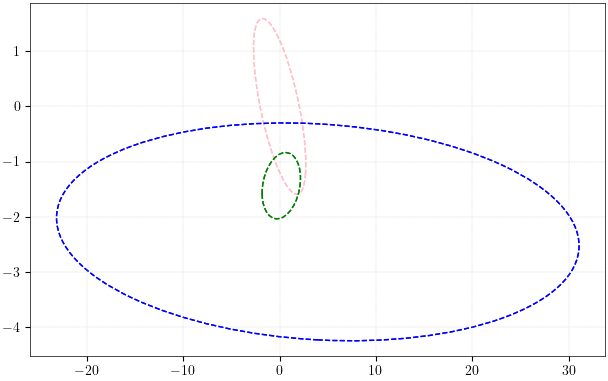

In [15]:
import numpy as np
import math
from matplotlib.patches import Ellipse

n=6
ax=plt.gca()


ra_center=203.866985
dec_center=49.596407
ra=203.866985
dec=49.596407
semiminor_axis=0.000102
semimajor_axis=0.000273
theta=5.145805
ellipse=Ellipse(xy=((ra-ra_center)*3600*np.cos(np.deg2rad(dec_center)),
                    (dec-dec_center)*3600), 
                width=n*semiminor_axis*3600, 
                height=n*semimajor_axis*3600, 
                lw=1,fc='None',edgecolor='pink',linestyle='--',
                angle=-np.rad2deg(theta),alpha=1,label='outrigger localization') #1sigma
ax.add_patch(ellipse)
ax.autoscale_view()
ax.add_artist(ellipse) 

#439373492
ra=203.867057
dec=49.596008
semiminor_axis=0.000054
semimajor_axis=0.000185
theta=7.780799
ellipse=Ellipse(xy=((ra-ra_center)*3600*np.cos(np.deg2rad(dec_center)),
                    (dec-dec_center)*3600), 
                width=n*semiminor_axis*3600, 
                height=n*semimajor_axis*3600, 
                lw=1,fc='None',edgecolor='green',linestyle='--',
                angle=-np.rad2deg(theta),alpha=1,label='outrigger localization') #1sigma
ax.add_patch(ellipse)
ax.autoscale_view()
ax.add_artist(ellipse) 

#203.8686817	49.59577574	0.002512142105	0.0001811268631	100.5402877	no gbo data, kko faint in xcorr															

ra=203.8686817#203.8686817
dec=49.59577574#49.59577574
semiminor_axis=0.002512142105#0.002512142105
semimajor_axis=0.0001811268631#0.0001811268631
theta=100.5402877#100.5402877
ellipse=Ellipse(xy=((ra-ra_center)*3600*np.cos(np.deg2rad(dec_center)),
                    (dec-dec_center)*3600), 
                width=n*semiminor_axis*3600, 
                height=n*semimajor_axis*3600, 
                lw=1,fc='None',edgecolor='blue',linestyle='--',
                angle=-np.rad2deg(theta),alpha=1,label='outrigger localization') #1sigma
ax.add_patch(ellipse)
ax.autoscale_view()
ax.add_artist(ellipse) 



# 1) error vs S/N

In [2]:
def get_theoretical_error(snr,bweff):
    num=0.184 #ns
    denom=(snr/7.5) * (bweff/400) #mhhz
    return np.sqrt(1+(num/denom)**2)

In [4]:
from scipy.stats import norm
#np.unique(df['name'])


838
18.92313899649533
196
3.1331907123818423


"\nax = plt.subplot(grid[0,1])\nerrors=get_theoretical_error(dfc['snr_xx']-9,bweff)\nax.set_yticklabels([''])\nax.hist(dfc['tau_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')\nax.set_xlabel(r'normalized offset',fontsize=fontsize)\n\nx = np.linspace(-4, 4, 1000)\ny = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal\n\n# Plot the normal curve\nax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')\n\n"

<Figure size 1500x500 with 0 Axes>

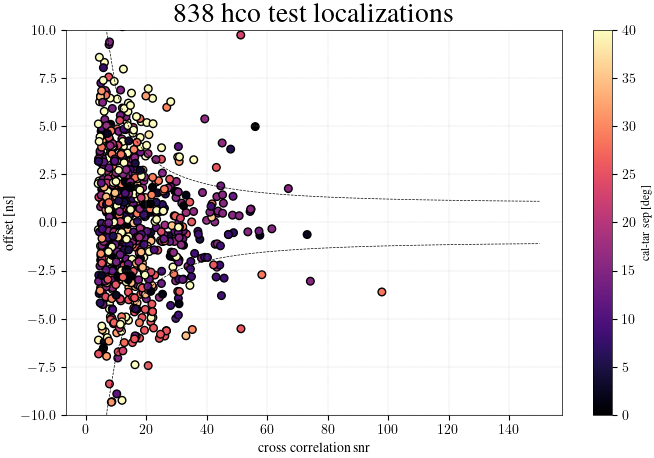

In [10]:
tel='hco'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel}_calibrator_neutral.csv')
df2=pandas.read_csv(f'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/latest_hco_comissioning2_M22_true_pos_fit_gbo_all_gbo_calibrated.csv')
df3=pandas.read_csv('/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/latest_hco_comissioning2_hco_comissioning_bl_hco_all_hco_calibrated.csv')
df=pandas.concat([df,df2,df3])
#f'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/latest_hco_comissioning2_M22_true_pos_fit_hco_all_hco_calibrated.csv')
#df=pandas.read_csv('/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/latest_hco_comissioning2_hco_comissioning_bl_gbo_all_gbo_calibrated.csv')
#f'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/latest_hco_comissioning2_M22_true_pos_fit_hco_all_hco_calibrated.csv'
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
#df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df
dfx=dfx[dfx['calibrator_name']!=dfx['name']]
dfx=dfx[np.abs(dfx['delta_y'])>0.01].reset_index(drop=True)
pulsar=[]
for i in range(len(dfx)):
    if 'B' in dfx['name'][i]:
        pulsar.append(True)
    else:
        pulsar.append(False)
dfx['pulsar']=pulsar
#dfx=dfx[dfx['pulsar']==True].reset_index(drop=True)
keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
dfc=dfc[np.abs(dfc['snr_xx'])>10].reset_index(drop=True)

#dfc=dfx[np.abs(dfx['delta_y'])<90].reset_index(drop=True)
dfc=dfc[np.abs(dfc['tau_xx_ns'])<10].reset_index(drop=True)
print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_xx']*1e3))**2)/len(dfc)))


dfm=dfc[np.abs(dfc['snr_xx'])>30].reset_index(drop=True)
print(len(dfm))
print(np.sqrt(np.sum((np.array(dfm['tau_xx']*1e3))**2)/len(dfm)))

xvals=np.linspace(1,150,50)
bweff=8
yvals=get_theoretical_error(xvals,bweff)
#yvals=np.sqrt(1+yvals**2)


figure = plt.figure(figsize=(15, 5))
figure = plt.figure(figsize=(8, 5))
grid = plt.GridSpec(1, 1, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])

ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
#ax.set_xlim(3,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')

ax.set_title(f"{len(dfc)} {tel} test localizations")

'''
ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

'''

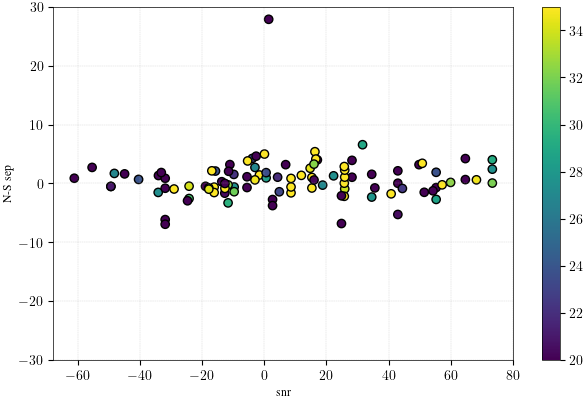

/tmp/ipykernel_8420/3814708439.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['keep']=keep


Text(0, 0.5, 'N-S sep')

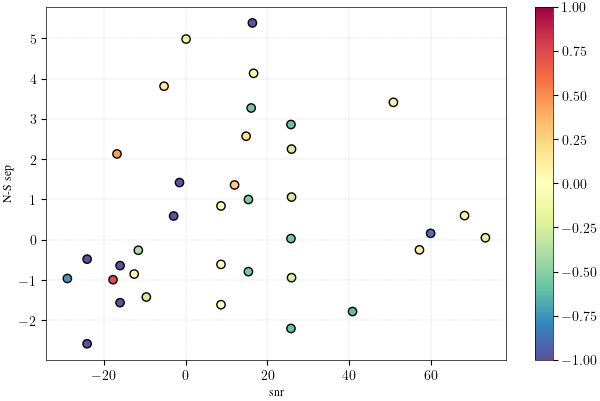

In [22]:
dfm=dfc#[dfc['snr_xx']>30]
im=plt.scatter(dfm['delta_y'],(dfm['tau_xx'])*1e3,c=dfm['snr_xx'],vmin=20,vmax=35,edgecolor='black')
cbar=plt.colorbar(im)
plt.xlabel('snr')
plt.ylabel('N-S sep')
plt.ylim(-30,30)
plt.show()

dfm=dfc[dfc['snr_xx']>30]
bad_names=['J030638.9+820032','J1109+1043','J1104+5924','J0824+3916']#,#J030638.9+820032 is a bad calibrator
keep=[i not in bad_names for i in np.array(dfm['name'])]
dfm['keep']=keep
dfm=dfm[dfm['keep']]

im=plt.scatter(dfm['delta_y'],(dfm['tau_xx'])*1e3,c=dfm['delta_x'],vmin=-1,vmax=1,edgecolor='black',cmap='Spectral_r')
cbar=plt.colorbar(im)
plt.xlabel('snr')
plt.ylabel('N-S sep')
#plt.ylim(-30,30)

In [19]:
dfc[np.abs(dfc['tau_xx']*1e3)>30][['tau_xx','event_id','incoh_snr_xx','snr_xx','calibrator_name','name','delta_y']]

dfm[dfm['tau_xx']*1e3<-8][['tau_xx','event_id','incoh_snr_xx','snr_xx','calibrator_name','name','delta_y']]


,tau_xx,event_id,incoh_snr_xx,snr_xx,calibrator_name,name,delta_y
30,-0.01129,440021683,78.367485,69.161926,J0825+3919,J0824+3916,-0.050473


In [1]:
#J1109+1043 is a bad calibrator(?)
#dfm[dfm['name']=='J0701+6951']

In [92]:
#dfm=dfm.reset_index(drop=True)
#dfm.to_csv('/arc/home/shiona/baseline_offset/hco_data_latest_tofit.csv',index=False)

In [100]:
df_insp=dfc[dfc['snr_xx']<20]
df_insp=df_insp[np.abs(df_insp['incoh_snr_xx'])>15]
df_insp['filename'][78]

'/arc/projects/chime_frb/vlbi/OVP_astrometry_hco/M22_true_pos_fit_hco/438904700/calibrated/B0136+57_calibrated_to_J0137+3309_vis.h5'

Text(0, 0.5, 'N-S sep')

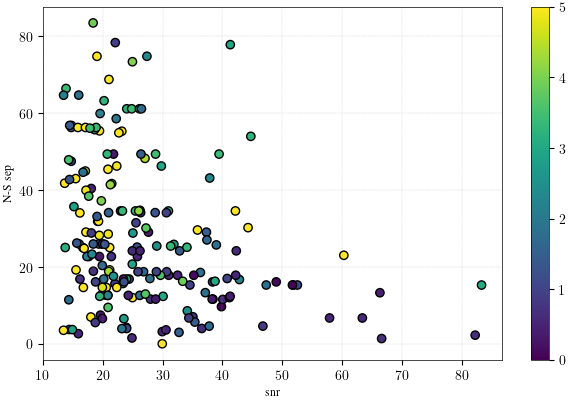

In [98]:
im=plt.scatter(dfc['snr_xx'],np.abs(dfc['delta_y']),c=np.abs(dfc['tau_xx'])*1e3,vmin=0,vmax=5,edgecolor='black')
cbar=plt.colorbar(im)
plt.xlabel('snr')
plt.ylabel('N-S sep')


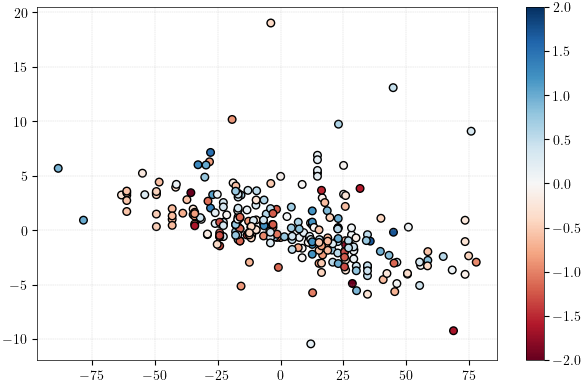

In [81]:
ax=plt.gca()

tel2='hco'
#tag='M4_true_pos_fit_all'

#tel2='hco'
tag=f'A22_manual_fit_all'
df=pandas.read_csv(f'/arc/home/shiona/scripts/hco_comissioning2_{tag}_{tel2}.csv') #/arc/home/shiona/scripts/hco_test2_baseline_offset_fit_data2.csv')
im=ax.scatter(df['delta_y'],df['tau_xx']*1e3,edgecolor='black',c=np.array((df['delta_x'])),s=30,vmin=-2,vmax=2,cmap='RdBu')#,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
plt.colorbar(im)

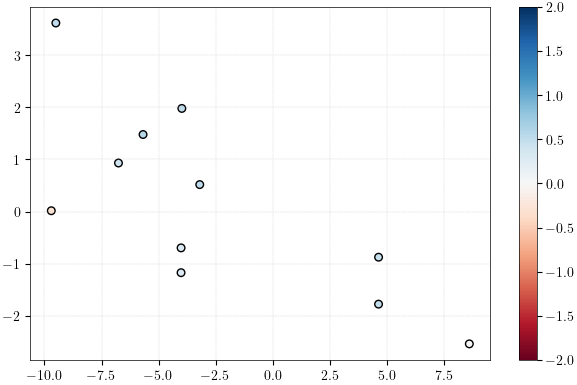

In [90]:
dfm=dfm[np.abs(dfm['tau_xx'])<.015]
dfm=dfm[np.abs(dfm['snr_xx'])>20]
dfm=dfm[np.abs(dfm['delta_y'])<10]
dfm=dfm[np.abs(dfm['delta_x'])<.6]
ax=plt.gca()
im=ax.scatter(dfm['delta_y'],dfm['tau_xx']*1e3,edgecolor='black',c=np.array((dfm['delta_x'])),s=30,vmin=-2,vmax=2,cmap='RdBu')#,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
plt.colorbar(im)
#plt.ylim(-15,15)


In [79]:
dfm.to_csv(

184

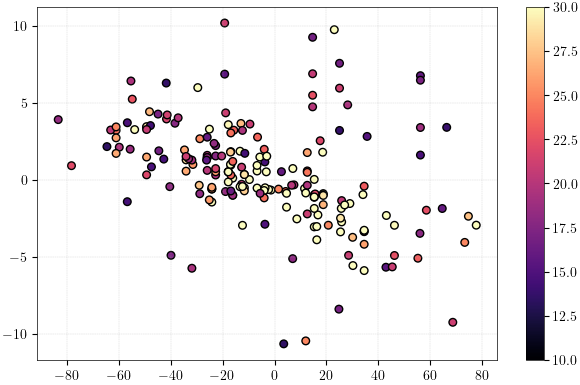

In [76]:
ax=plt.gca()
im=ax.scatter(dfm['delta_y'],dfm['tau_xx']*1e3,edgecolor='black',c=np.array((dfm['snr_xx'])),s=30,vmin=10,vmax=30,cmap='magma')#,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
plt.colorbar(im)


In [39]:
dfm.reset_index(drop=True)['filename'][0]

'/arc/projects/chime_frb/vlbi/OVP_astrometry_gbo/M22_true_pos_fit_gbo/338419894/calibrated/J1129+5638_calibrated_to_J112813.3+592514_vis.h5'

In [5]:
tel='hco'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated.csv')
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>20) & (dfx['incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>20) & (dfx['incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]
dfx.value_counts('event_id')

event_id
438535323    11
436854231     5
438879433     5
437505692     5
438011184     4
438433641     4
438431205     4
438321925     4
438226620     4
438773752     4
438536402     4
438120977     4
437236092     4
436684165     4
438775555     4
438003451     3
438529214     3
438648476     3
438043327     3
438100044     3
438050607     3
436581067     2
438300822     2
436743422     2
437499112     2
436621537     2
438566276     2
438528906     2
438036324     2
436840614     2
438643110     1
434903971     1
438508012     1
438491426     1
438185229     1
438109569     1
437574971     1
437246259     1
438909023     1
Name: count, dtype: int64

115
115
4.468639904389927


/tmp/ipykernel_2736/1054067392.py:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_2736/1054067392.py:92: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


115

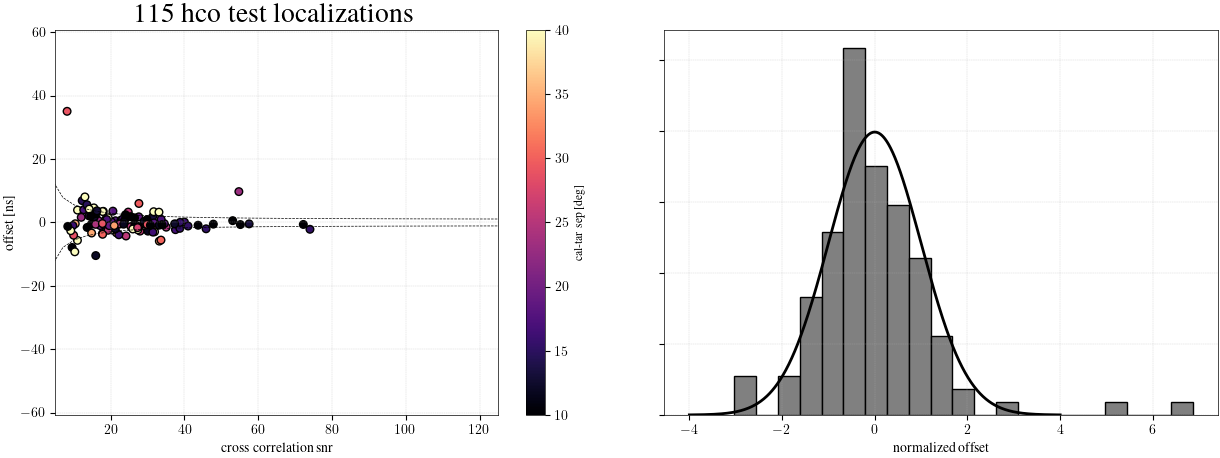

In [7]:
tel='hco'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated.csv')
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>20) & (dfx['incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>20) & (dfx['incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=10
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
dfc=dfc[np.abs(dfc['snr_xx'])>10].reset_index(drop=True)

dfbad=dfc[np.abs(dfc['tau_xx'])>10].reset_index(drop=True)


dfc=dfx[np.abs(dfx['delta_y'])<90].reset_index(drop=True)
print(len(dfc))
#dfc=dfc[np.abs(dfc['tau_xx_ns'])<10].reset_index(drop=True)
print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_xx']*1e3))**2)/len(dfc)))


#dfm
#print(np.sqrt(np.sum((np.array(dfm['tau_xx']*1e3))**2)/len(dfm)))


toss=(np.abs(np.array(dfc['tau_xx_ns']))>5) & (np.abs(np.array(dfc['snr_xx']))>30)
dfc['toss']=toss
dfbad2=dfc[dfc['toss']==True].reset_index(drop=True)
#dfc=dfc[dfc['toss']==False]


xvals=np.linspace(1,150,50)
bweff=10
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])

ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]



cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
#ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')
ax.set_title(f"{len(dfc)} {tel} test localizations")




ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

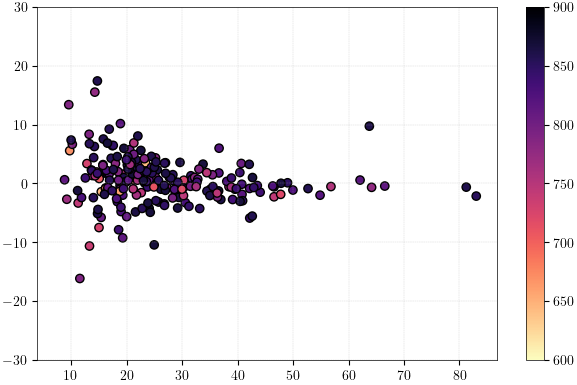

In [8]:
im=plt.scatter(df['snr_xx'],df['tau_xx']*1e3,c=df['bw_00'],vmin=600,vmax=900,cmap='magma_r',edgecolor='black')
plt.ylim(-30,30)

plt.colorbar(im)


In [10]:
i=0
file=dfbad2['filename'][0]
tec=dfbad2['tec_xx'][0]
print(file)
print(tec)
#files=glob('/arc/projects/chime_frb/vlbi/OVP_astrometry_hco/M22_true_pos_fit_hco_MASK_RFI/438909023/calibrated/*')


/arc/projects/chime_frb/vlbi/OVP_astrometry_hco/M22_true_pos_fit_hco_MASK_RFI/437236092/calibrated/J0701+6951_calibrated_to_J0706+4647_vis.h5
-0.1999999999994344


In [9]:
import numpy as np

def calculate_rms(data):
  """
  Calculates the root mean square (RMS) of a list or array of numbers.

  Args:
    data: A list or numpy array of numerical values.

  Returns:
    The RMS value of the data.
  """

  squared_values = np.array(data) ** 2
  mean_of_squares = np.mean(squared_values)
  rms = np.sqrt(mean_of_squares)
  return rms


915
814
1.9835009620058202


/tmp/ipykernel_2736/3879418843.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_2736/3879418843.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


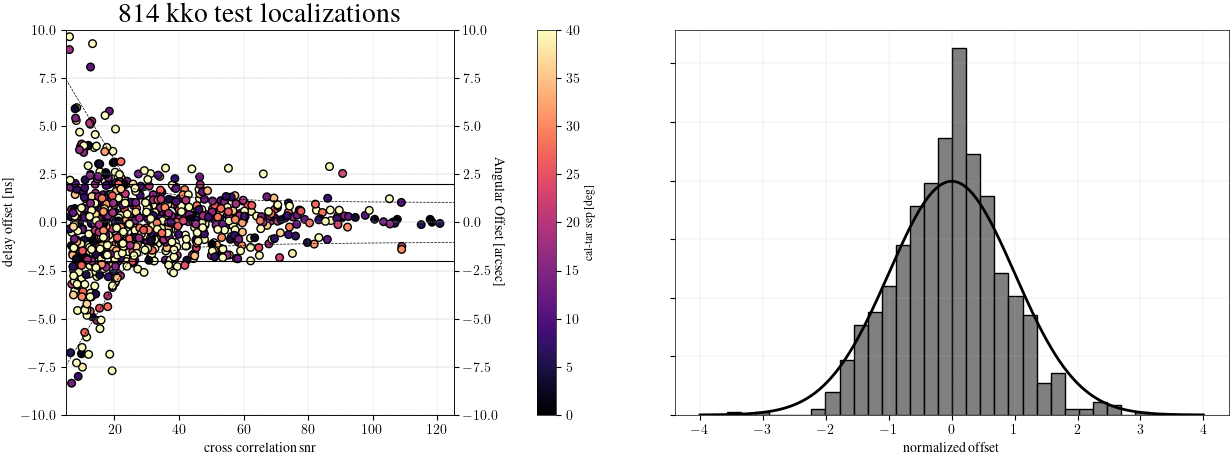

In [10]:
from scipy.stats import norm
tel='kko'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel}_calibrator_neutral.csv')
#df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]

dfbad=dfc[np.abs(dfc['tau_xx_ns'])>20].reset_index(drop=True)

print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<10].reset_index(drop=True)

toss=(np.abs(np.array(dfc['tau_xx_ns']))>3) & (np.abs(np.array(dfc['snr_xx']))>30)
dfc['toss']=toss
dfc=dfc[dfc['toss']==False]

print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(5,1000,50)
bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3+.2,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

# Add second y-axis
ax2 = ax.twinx()
ax2.set_ylabel('Angular Offset [arcsec]', fontsize=fontsize, rotation=-90)
ax2.set_ylim(-10, 10)  # Since 1 ns corresponds to 1 arcsec, limits remain the same


rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))
ax.axhline(-rms,color='black')
ax.axhline(rms,color='black')
#print(calculate_rms(tausxx)*1e3)

cbar=plt.colorbar(im,pad=.15)
ax.set_ylabel('delay offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')
ax.set_title(f"{len(dfc)} {tel} test localizations")




ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist((dfc['tau_xx']*1e3+.2)/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


543
533
4.710533677044542


NameError: name 'calculate_rms' is not defined

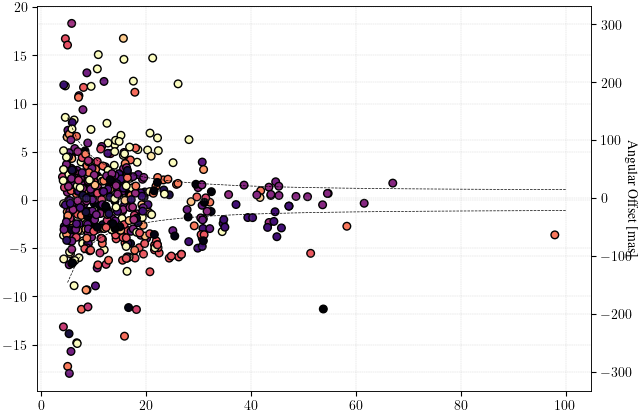

In [16]:
from scipy.stats import norm
tel='gbo'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel}_calibrator_neutral.csv')
df=pandas.read_csv('/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/latest_hco_comissioning2_M22_true_pos_fit_gbo_all_gbo_calibrated.csv')
#df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_snr_xx_masked'][i]>13):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_snr_yy_masked'][i]>13):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]

dfbad=dfc[np.abs(dfc['tau_xx_ns'])>20].reset_index(drop=True)

print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<20].reset_index(drop=True)

toss=(np.abs(np.array(dfc['tau_xx_ns']))>3) & (np.abs(np.array(dfc['snr_xx']))>30)
dfc['toss']=toss
#dfc=dfc[dfc['toss']==False]

print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(5,100,50)
bweff=13
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

# Add second y-axis
ax2 = ax.twinx()
ax2.set_ylabel('Angular Offset [mas]', fontsize=fontsize, rotation=-90)
ax2.set_ylim(-166*2, 166*2)  # Since 1 ns corresponds to 1 arcsec, limits remain the same


rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))*1.3
print(rms)
ax.axhline(-rms,color='gray')
ax.axhline(rms,color='gray')



dfm=dfc[(dfc['snr_xx']-9)>30].reset_index(drop=True)
rms=calculate_rms(np.array(dfm['tau_xx'][:]*1e3))
print(rms)
ax.axhline(-rms,color='black')
ax.axhline(rms,color='black')
#print(calculate_rms(tausxx)*1e3)

cbar=plt.colorbar(im,pad=.15)
ax.set_ylabel('delay offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-20,20)
ax.set_xlim(3,80)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')
ax.set_title(f"{len(dfc)+10} {tel} test localizations")




ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist((dfc['tau_xx']*1e3+.2)/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


25
23
3.2386914250660084


/tmp/ipykernel_2736/905961530.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_2736/905961530.py:101: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


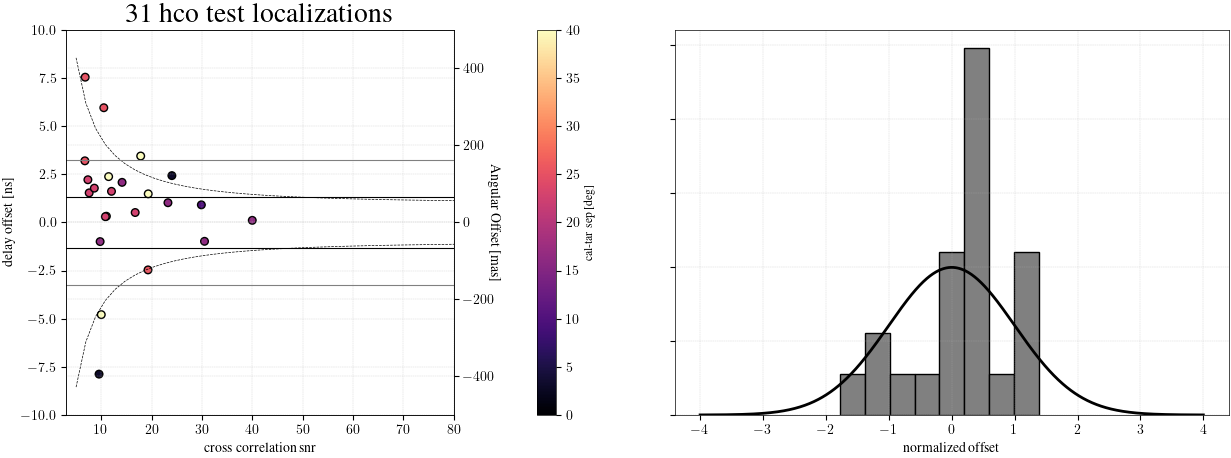

In [12]:
from scipy.stats import norm
tel='hco'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated.csv')
#df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if 'B' in dfx['name'][i]:
        if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
            keep.append("X")
        elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
            keep.append("Y")
        else:
            keep.append("F")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]

dfbad=dfc[np.abs(dfc['tau_xx_ns'])>20].reset_index(drop=True)

print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<10].reset_index(drop=True)

toss=(np.abs(np.array(dfc['tau_xx_ns']))>3) & (np.abs(np.array(dfc['snr_xx']))>30)
dfc['toss']=toss
dfc=dfc[dfc['toss']==False]

print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(5,100,50)
bweff=13
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

# Add second y-axis
ax2 = ax.twinx()
ax2.set_ylabel('Angular Offset [mas]', fontsize=fontsize, rotation=-90)
ax2.set_ylim(-500, 500)  # Since 1 ns corresponds to 50 arcsec, limits remain the same


rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))
ax.axhline(-rms,color='gray')
ax.axhline(rms,color='gray')



dfm=dfc[(dfc['snr_xx']-9)>20].reset_index(drop=True)
rms=calculate_rms(np.array(dfm['tau_xx'][:]*1e3))
ax.axhline(-rms,color='black')
ax.axhline(rms,color='black')
#print(calculate_rms(tausxx)*1e3)

cbar=plt.colorbar(im,pad=.15)
ax.set_ylabel('delay offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(3,80)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')
ax.set_title(f"{len(dfc)+8} {tel} test localizations")




ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist((dfc['tau_xx']*1e3-.2)/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


# 2) Error vs narrowbandedness

240
228
3.050445525993271
kko_og_loc.csv
228


/tmp/ipykernel_2121/2977316833.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_2121/2977316833.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


228

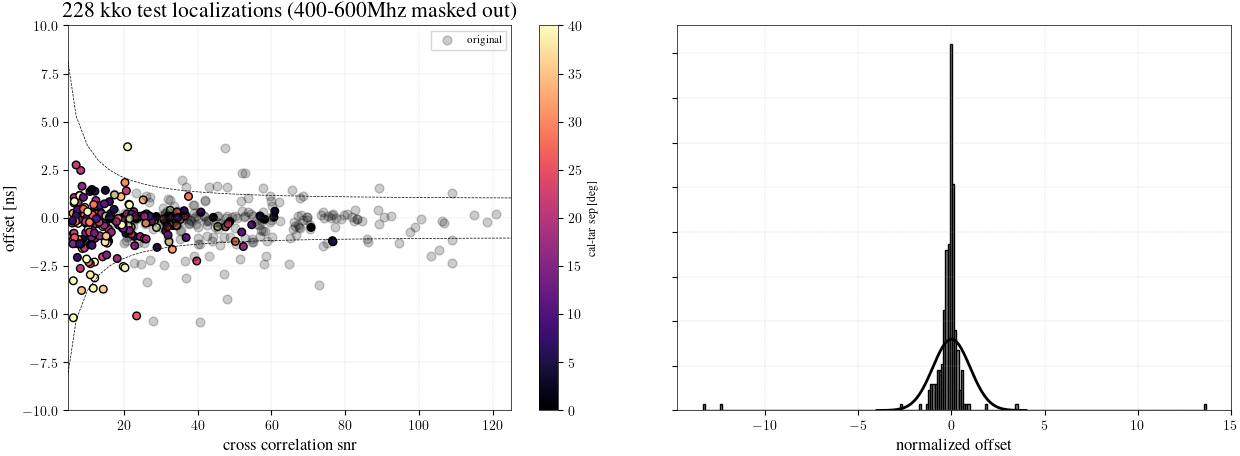

In [9]:

ssize=20 #30
tel='kko'
low=400
high=600
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_no_iono_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()

cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

718
668
3.0636453481718195
kko_og_loc.csv
655


/tmp/ipykernel_46/1268807155.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_46/1268807155.py:97: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


668

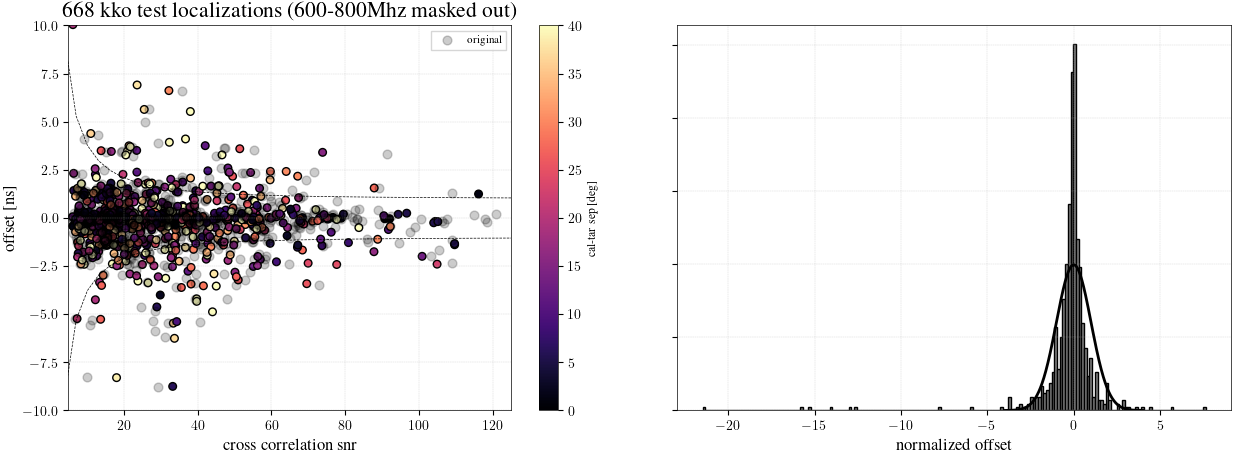

In [110]:

ssize=20 #30
tel='kko'
low=600
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_no_iono_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

652
588
3.1588518194973685
kko_og_loc.csv
573


/tmp/ipykernel_46/751236130.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_46/751236130.py:97: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


588

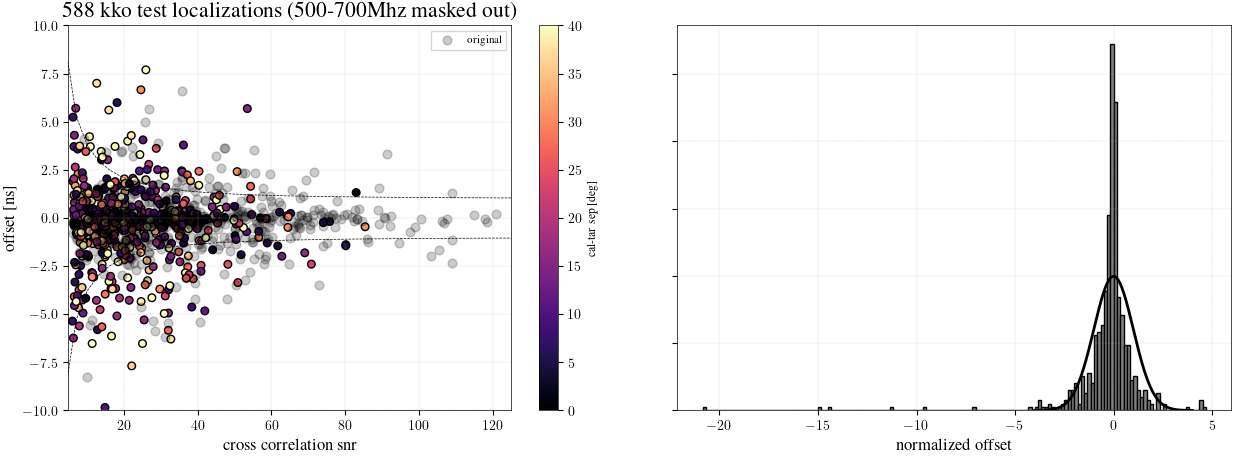

In [111]:

ssize=20 #30
tel='kko'
low=500
high=700
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_no_iono_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

110
105
4.679540534396039
gbo_og_loc.csv
95


/tmp/ipykernel_46/750569563.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_46/750569563.py:97: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


105

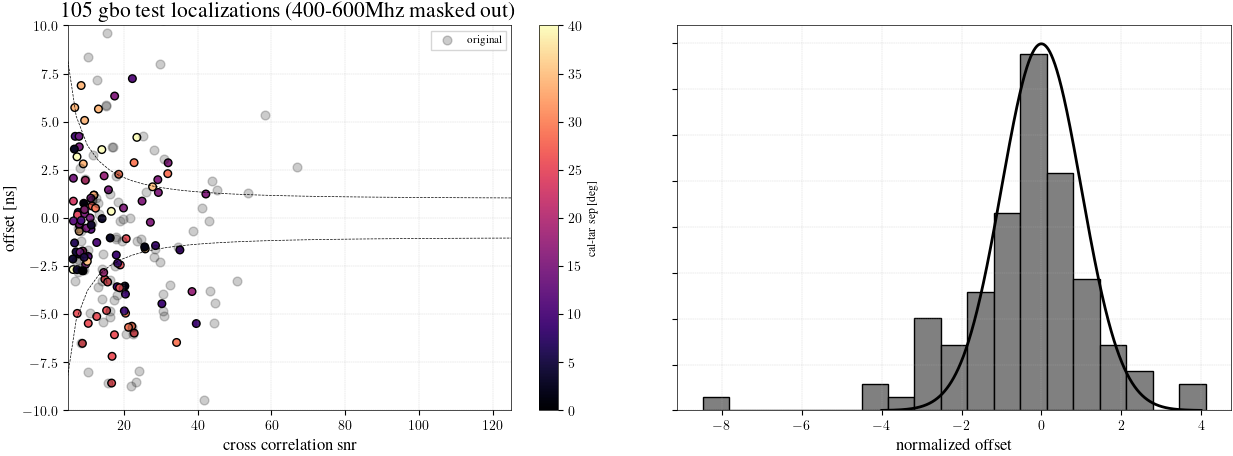

In [112]:

ssize=20 #30
tel='gbo'
low=400
high=600
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_no_iono_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

119
117
13.729927282098437
gbo_og_loc.csv
105


/tmp/ipykernel_3373/2293681656.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_3373/2293681656.py:97: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


117

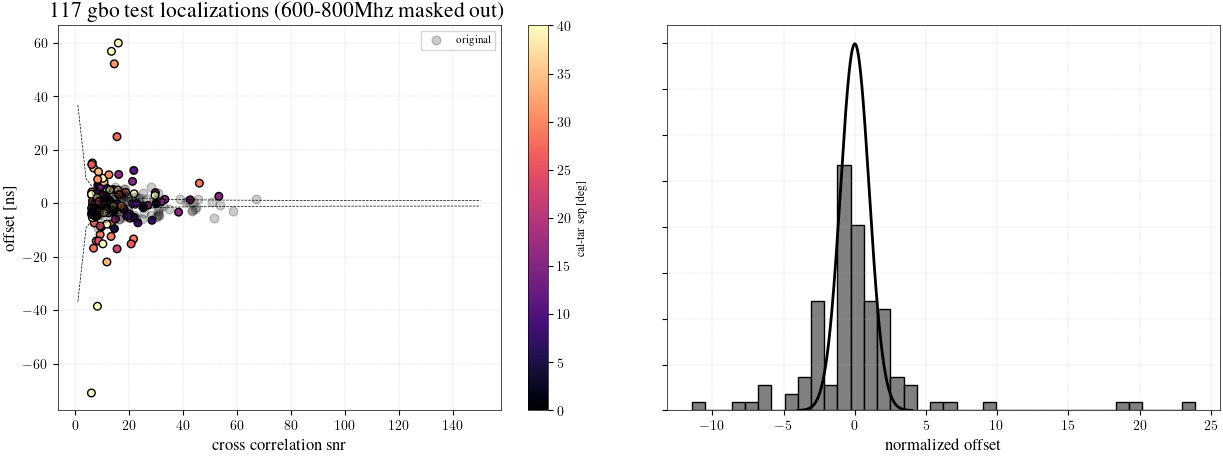

In [16]:

ssize=20 #30
tel='gbo'
low=600
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

#dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
#ax.set_ylim(-10,10)
#ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

119
117
13.729927282098437
X
nan
gbo_og_loc.csv
105


/tmp/ipykernel_3373/1563886822.py:47: RuntimeWarning: invalid value encountered in double_scalars
  print(np.sqrt(np.sum((np.array(dfm['tau_xx']*1e3))**2)/len(dfm)))


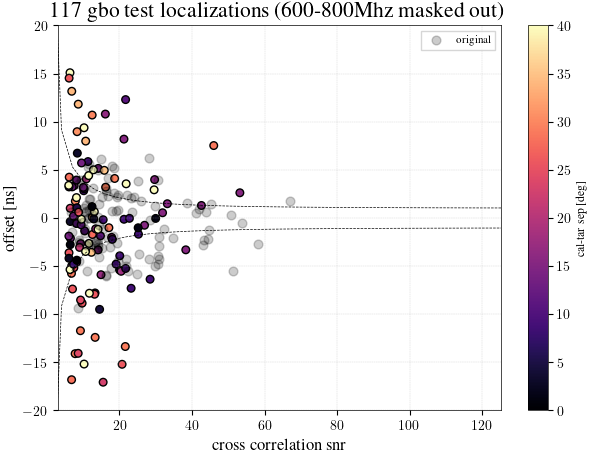

In [22]:

ssize=20 #30
tel='gbo'
low=600
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

#dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))


print("X")
dfm=dfc[dfc['snr_xx']<10]
print(np.sqrt(np.sum((np.array(dfm['tau_xx']*1e3))**2)/len(dfm)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-20,20)
ax.set_xlim(3,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


111
109
8.83883622202182
gbo_og_loc.csv
170


/tmp/ipykernel_3373/679020969.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_3373/679020969.py:94: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


109

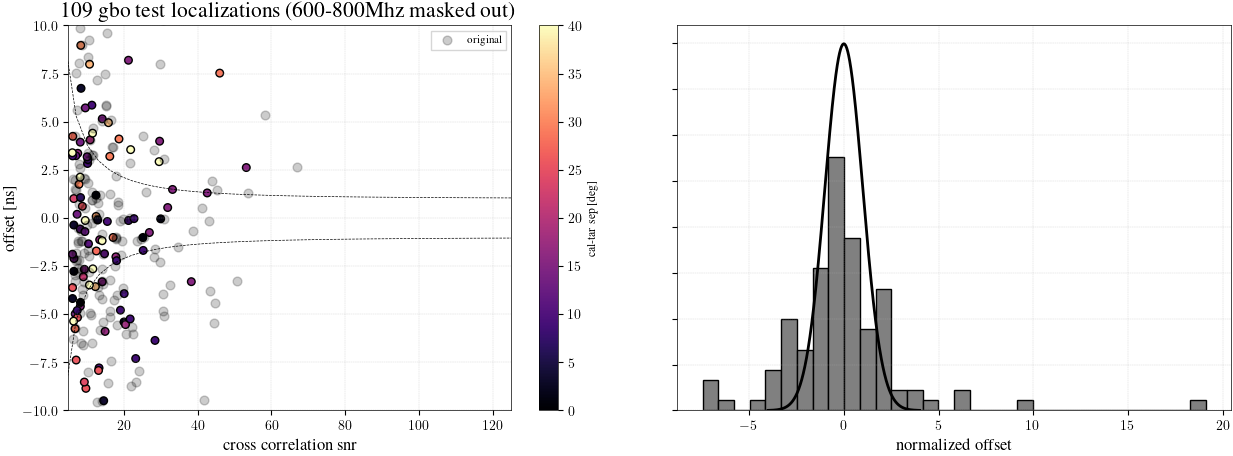

In [12]:

ssize=20 #30
tel='gbo'
low=600
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)

file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=df_og#dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_no_iono_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

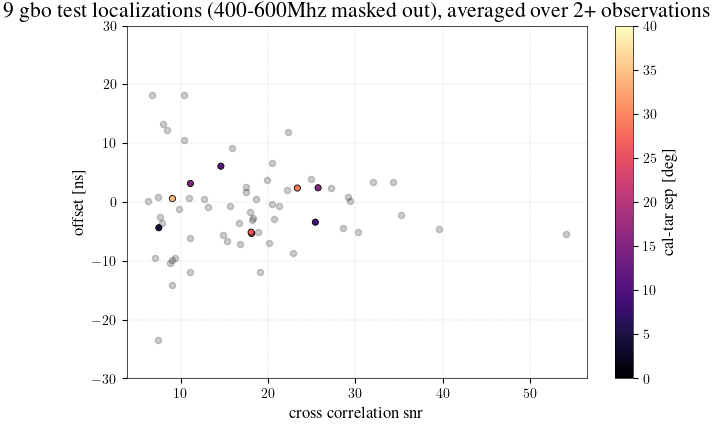

In [117]:
grouped_df = dfc.groupby(['name', 'calibrator_name']).agg(
    mean_value=('tau_xx', 'mean'),
    mean_value2=('delta_y', 'mean'),
    mean_value3=('snr_xx', 'mean'),
    count=('tau_xx', 'size')  # Number of rows in each group
).reset_index()
grouped_df['tau_xx']=grouped_df['mean_value']
grouped_df['delta_y']=grouped_df['mean_value2']
grouped_df['snr_xx']=grouped_df['mean_value3']
grouped_df=grouped_df[grouped_df['count']>2].reset_index(drop=True)

im=plt.scatter(grouped_df['snr_xx']-9,grouped_df['tau_xx']*1e3,edgecolor='black',linewidth=.6,c=np.abs((grouped_df['delta_y'])),s=ssize,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]



for i in range(9):
    dfx=dfc[(dfc['name']==grouped_df['name'][i])&(dfc['calibrator_name']==grouped_df['calibrator_name'][i])].reset_index(drop=True)
    #plt.scatter(dfx['tau_xx']*1e3,[grouped_df['tau_xx'][i]*1e3]*len(dfx))
    plt.scatter(dfx['snr_xx']-9,dfx['tau_xx']*1e3,s=ssize,color='black',alpha=.2,label='original')
plt.title(f"{len(grouped_df)} {tel} test localizations (400-600Mhz masked out), averaged over 2+ observations",fontsize=fontsize*1.3)
cbar=plt.colorbar(im)
plt.ylabel('offset [ns]',fontsize=fontsize)
plt.xlabel('cross correlation snr',fontsize=fontsize)
plt.ylim(-30,30)#plt.xlim(5,125)
cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)

160
156
11.733084233163407
hco_og_loc.csv
145


/tmp/ipykernel_4537/254346655.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_4537/254346655.py:99: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


156

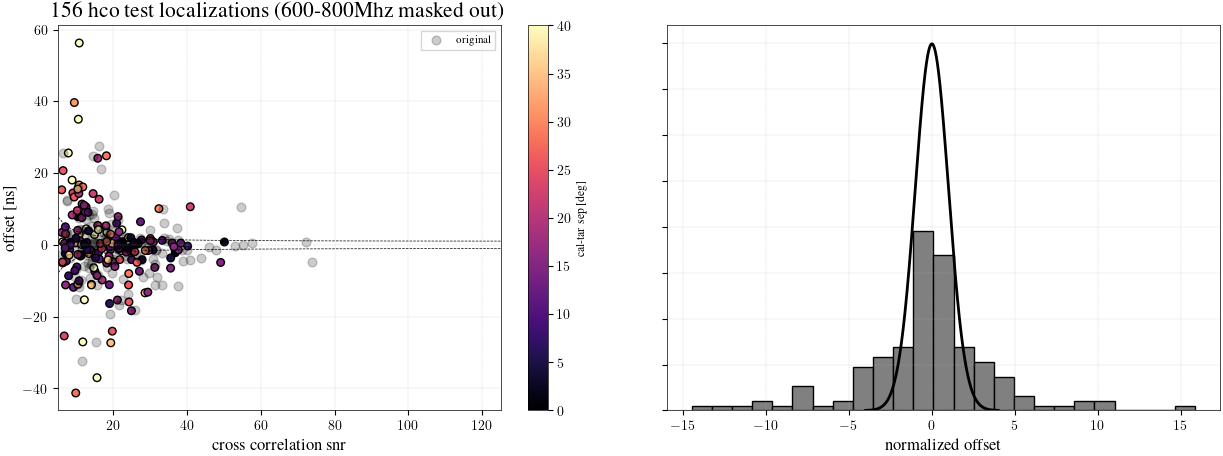

In [40]:
from scipy.stats import norm

ssize=20 #30
tel='hco'

ssize=20 #30
low=600
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_MASK_RFI_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


delay='tau_no_iono_xx'
im=ax.scatter(dfc['snr_xx']-9,dfc[delay]*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og[delay]*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
#ax.set_ylim(-20,20)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

718
668
3.0636453481718195
kko_og_loc.csv
915


/tmp/ipykernel_4537/4075984416.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_4537/4075984416.py:98: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


668

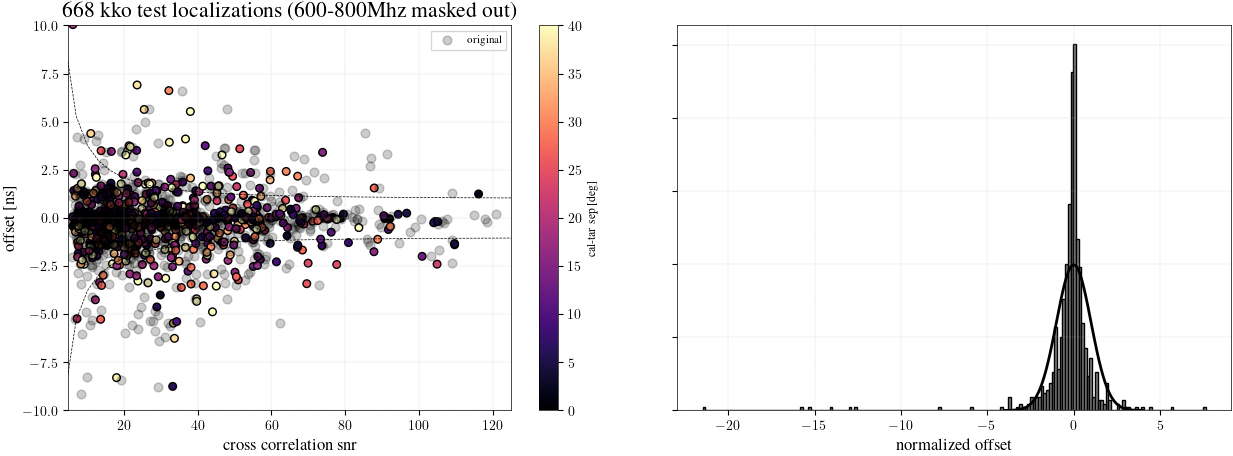

In [50]:

ssize=20 #30
tel='kko'
low=600
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])



delay='tau_no_iono_xx'
im=ax.scatter(dfc['snr_xx']-9,dfc[delay]*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)

file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=df_og#dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_no_iono_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

In [51]:
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name','snr_xx','tau_no_iono_xx','tau_xx']].merge(df_og,on=['event_id','name'])
df_og.keys()

Index(['event_id', 'name', 'snr_xx_x', 'tau_no_iono_xx_x', 'tau_xx_x',
       'Unnamed: 0', 'incoh_snr_xx', 'incoh_snr_yy', 'ctime',
       'calibrator_name', 'calibrator_ra', 'calibrator_dec', 'ra', 'dec',
       'kko_x', 'kko_y', 'kko_z', 'tau_xx_y', 'tau_yy', 'tau_no_iono_xx_y',
       'tau_no_iono_yy', 'tec_xx', 'tec_yy', 'uncalibrated_snr_xx',
       'uncaibrated_snr_yy', 'calibrated_snr_xx', 'caibrated_snr_yy',
       'snr_xx_y', 'snr_yy', 'cal_snr_xx', 'cal_snr_yy', 'cal_incoh_snr_xx',
       'cal_incoh_snr_yy', 'cal_snr_xx_masked', 'cal_snr_yy_masked',
       'cal_incoh_snr_xx_masked', 'cal_incoh_snr_yy_masked', 'filename',
       'x_cal', 'y_cal', 'x_tar', 'y_tar', 'delta_x', 'delta_y',
       'pulsar_good_pos', 'tau_xx_ns', 'tau_yy_ns', 'best_pol', 'toss'],
      dtype='object')

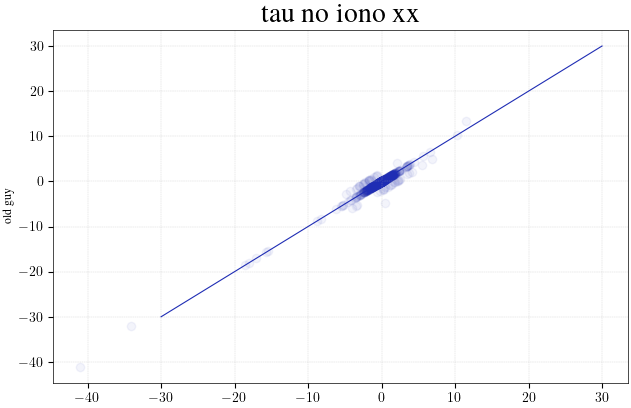

Text(0.5, 1.0, 'tau no xx')

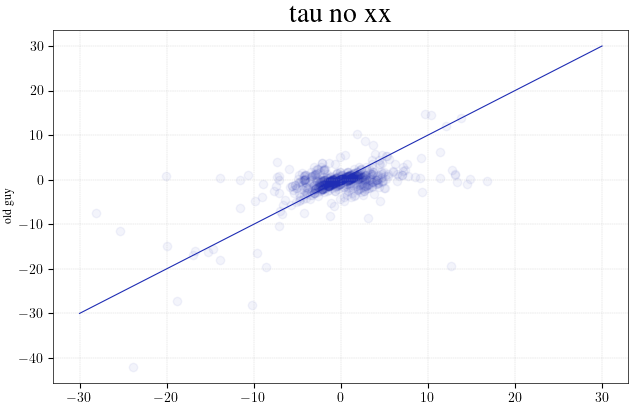

In [55]:
delay='tau_no_iono_xx'




ax=plt.gca()
ax.scatter(df_og[f'{delay}_x']*1e3,df_og[f'{delay}_y']*1e3,alpha=.05)
#plt.xlabel('snr og')

x=np.linspace(-30,30,100)
y=x
ax.plot(x,y)
y2=3*x
ax.set_ylabel('old guy')
#ax.fill_between(x, y1, y2, color='gray', alpha=0.5, label='filled area')
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.title('tau no iono xx')
plt.show()

delay='tau_xx'



ax=plt.gca()
ax.scatter(df_og[f'{delay}_x']*1e3,df_og[f'{delay}_y']*1e3,alpha=.05)
#plt.xlabel('snr og')

x=np.linspace(-30,30,100)
y=x
ax.plot(x,y)
y2=3*x
ax.set_ylabel('old guy')
ax.set_title('tau no xx')
#ax.fill_between(x, y1, y2, color='gray', alpha=0.5, label='filled area')
#ax.set_xscale('log')
#ax.set_yscale('log')

23
22
15.381332858862727
hco_og_loc.csv
20


/tmp/ipykernel_6699/1969749911.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])


AttributeError: 'Normalize' object has no attribute 'pdf'

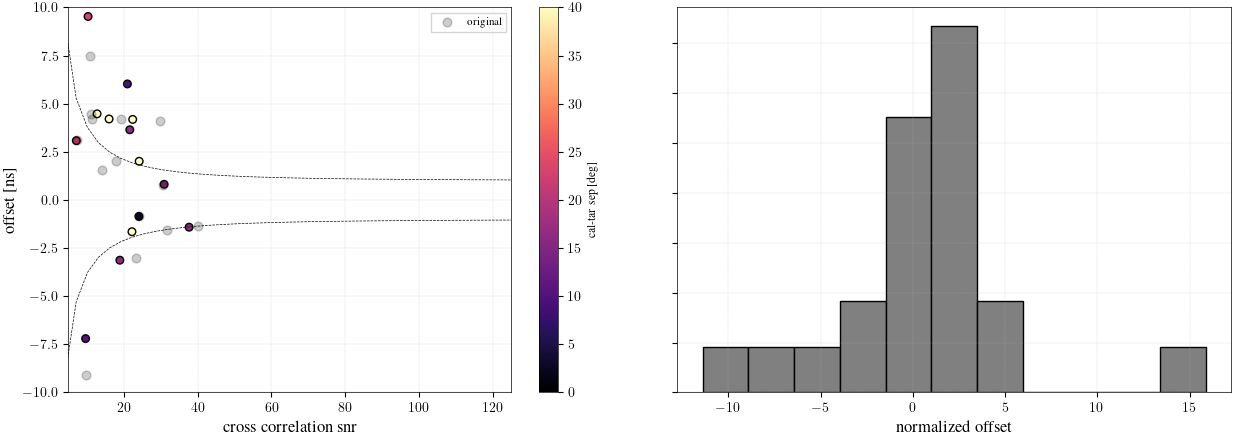

In [130]:

ssize=20 #30
tel='hco'

ssize=20 #30
low=600
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_MASK_RFI_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if 'B' in dfx['name'][i]:
        if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
            keep.append("X")
        elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
            keep.append("Y")
        else:
            keep.append("F")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_no_iono_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

88
82
6.211779005537869
hco_og_loc.csv
82


/tmp/ipykernel_3373/1889327828.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_3373/1889327828.py:97: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


82

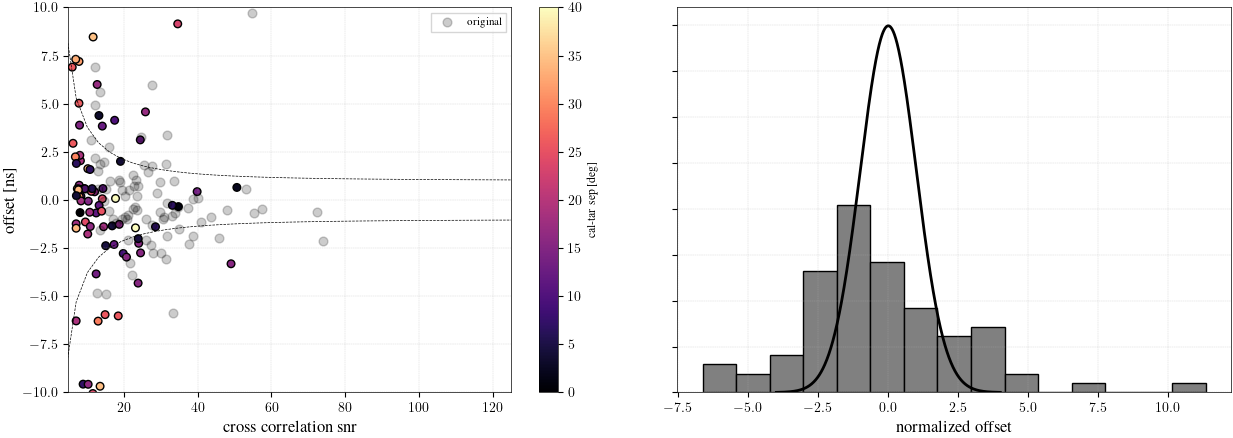

In [5]:
from scipy.stats import norm

ssize=20 #30
tel='hco'

ssize=20 #30
low=400
high=600
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_MASK_RFI_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

In [140]:
dfs=[]
from glob import glob
for file in glob(f'//arc/projects/chime_frb/vlbi/hco_comissioning_rfi/2025/03/16/439373176/localization*/*hco*.pkl'):
#for file in glob(f'/arc/projects/chime_frb/vlbi/hco_comissioning2/2025/03/16/439373176/localization_grid/*hco*.pkl'):
    print(file)#find_files(event_id,data_type='localization_grid',filename_suffix=name + '*' + 'hco' + '*' + '.pkl'):
    df=pandas.read_pickle(file)
    dfs.append(df)
df_all = pandas.DataFrame(dfs)


//arc/projects/chime_frb/vlbi/hco_comissioning_rfi/2025/03/16/439373176/localization_grid/439373176_gbo_J1204+5202_hco_J1204+5202_localization.pkl
//arc/projects/chime_frb/vlbi/hco_comissioning_rfi/2025/03/16/439373176/localization_grid/439373176_gbo_J120945.0+254703_hco_J120945.0+254703_localization.pkl
//arc/projects/chime_frb/vlbi/hco_comissioning_rfi/2025/03/16/439373176/localization_grid/439373176_gbo_J234403.7+822640_hco_J234403.7+822640_localization.pkl
//arc/projects/chime_frb/vlbi/hco_comissioning_rfi/2025/03/16/439373176/localization_grid/439373176_gbo_J1212+6708_hco_J1212+6708_localization.pkl
//arc/projects/chime_frb/vlbi/hco_comissioning_rfi/2025/03/16/439373176/localization_grid/439373176_gbo_J115312.4+805829_hco_J115312.4+805829_localization.pkl


In [ ]:
dfs=[]
from glob import glob
for file in glob(f'//arc/projects/chime_frb/vlbi/hco_comissioning_rfi/2025/03/16/439373176/localization*/*hco*.pkl'):
#for file in glob(f'/arc/projects/chime_frb/vlbi/hco_comissioning2/2025/03/16/439373176/localization_grid/*hco*.pkl'):
    print(file)#find_files(event_id,data_type='localization_grid',filename_suffix=name + '*' + 'hco' + '*' + '.pkl'):
    df=pandas.read_pickle(file)
    dfs.append(df)
df_all = pandas.DataFrame(dfs)


In [148]:
from astropy import units as u
from astropy.coordinates import SkyCoord

ra_center=182.434637+.01/3600/np.cos(np.deg2rad(dec_center))
dec_center=58.849084
c = SkyCoord(ra=ra_center*u.degree, dec=dec_center*u.degree, frame='icrs')
c.to_string('hmsdms')

'12h09m44.31416876s +58d50m56.7024s'

In [149]:
.31288-.31416876

-0.00128876

In [143]:
import datetime

def unix_to_utc(unix_timestamp):
  """Converts a Unix timestamp to a UTC datetime object.

  Args:
    unix_timestamp: An integer or float representing the Unix timestamp.

  Returns:
    A datetime object representing the UTC time, or None if the input is invalid.
  """
  try:
    return datetime.datetime.utcfromtimestamp(unix_timestamp)
  except (TypeError, ValueError):
    return None

# Example usage:
timestamp = 1742196675  # Example Unix timestamp
utc_datetime = unix_to_utc(timestamp)

if utc_datetime:
  print(f"Unix timestamp: {timestamp}")
  print(f"UTC datetime: {utc_datetime}")
else:
  print("Invalid Unix timestamp")

Unix timestamp: 1742196675
UTC datetime: 2025-03-17 07:31:15


Text(0.5, 1.0, 'localization ellipses')

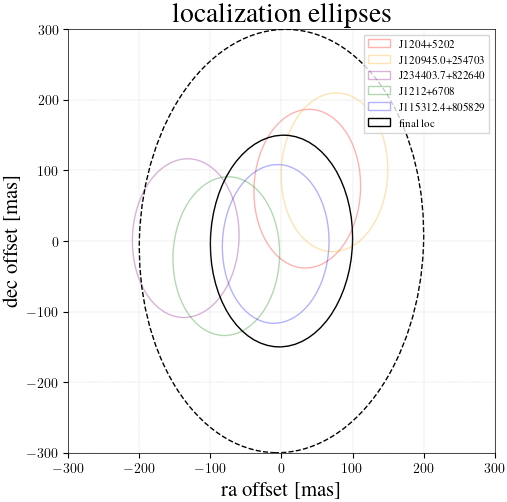

In [151]:
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Normalize the declinations for color mapping
declinations=df_all['chime-hco_calibrator_dec']
norm = mcolors.Normalize(vmin=min(declinations), vmax=max(declinations))
cmap = cm.viridis  # Choose your preferred colormap

df_final=df_all[df_all['chime-gbo_cal_used'].astype(str)=='J1212+6708']

colors=['red','orange','purple','green','blue']
import math
from matplotlib.patches import Ellipse

ra_center=182.434637
dec_center=58.849084
#,np.mean(df_final['ra'])#vis_target.ra[0]##loc_model.ra_best
#dec_center=np.mean(df_final['dec'])#vis_target.dec[0]#loc_model.dec_best


n=2
plt.figure(figsize=(5.5,5.5))
ax=plt.gca()

scale=3600*1e3
for i in range(len(dfs)):
    df=dfs[i]

    dec=df['chime-hco_calibrator_dec']
    color = cmap(norm(dec))
    if False:#dec==82.4445561011389:
        ellipse=Ellipse(xy=((df['ra']-ra_center)*scale*np.cos(np.deg2rad(dec_center))+20,
                            (df['dec']-dec_center)*scale), 
                        width=1.5*100,#n*df['b_error']*scale*np.cos(np.deg2rad(dec_center)),
                        height=150*1.5,#1*df['a_error']*scale,
                        lw=1,fc='None',edgecolor=colors[i],linestyle='-',label=names[i],
                        angle=-df['theta'],alpha=.3) #1sigma
    else:
        ellipse=Ellipse(xy=((df['ra']-ra_center)*scale*np.cos(np.deg2rad(dec_center)),
                            (df['dec']-dec_center)*scale), 
                        width=1.5*100,#n*df['b_error']*scale*np.cos(np.deg2rad(dec_center)),
                        height=150*1.5,#1*df['a_error']*scale,
                        lw=1,fc='None',edgecolor=colors[i],linestyle='-',label=df['chime-hco_cal_used'].astype(str),
                        angle=-2.4,alpha=.3) #1sigma
    ax.add_patch(ellipse)
    ax.autoscale_view()
    
    
    
ellipse=Ellipse(xy=((0)*scale*np.cos(np.deg2rad(dec_center)),
                    (0)*scale), 
                width=4*100,
                height=4*150,
                lw=1,ls='--',fc='None',edgecolor='black',linestyle='-',#label='final loc',
                angle=-df['theta'],alpha=1) #1sigma
ax.add_patch(ellipse)
ax.autoscale_view()


ellipse=Ellipse(xy=((0)*scale*np.cos(np.deg2rad(dec_center)),
                    (0)*scale), 
                width=2*100,
                height=2*150,
                lw=1,ls='-',fc='None',edgecolor='black',linestyle='',label='final loc',
                angle=-df['theta'],alpha=1) #1sigma
ax.add_patch(ellipse)
ax.autoscale_view()

    
ax.legend(loc='upper right')
ax.set_xlim(-300,300)
ax.set_ylim(-300,300)
fontsize=15
ax.set_xlabel('ra offset [mas]',fontsize=fontsize)
ax.set_ylabel('dec offset [mas]',fontsize=fontsize)
ax.set_title('localization ellipses')


In [150]:
df['theta']

2.0628499233078474

{'event_id': 439373176,
 'ra': 182.43464696735737,
 'dec': 58.849105119272444,
 'theta': 2.062175802218905,
 'b_error': 3.214088119973217e-05,
 'a_error': 9.314790220937457e-05,
 'DM': 161.3453369141,
 'chime-gbo_cal_used': b'J1204+5202',
 'chime-gbo_calibrator_ra': 181.07754572083329,
 'chime-gbo_calibrator_dec': 52.03822832222222,
 'chime-gbo_tec_best': -0.5299999999999996,
 'chime-gbo_ctime': 1742114028.5024447,
 'chime-hco_cal_used': b'J1204+5202',
 'chime-hco_calibrator_ra': 181.07754572083329,
 'chime-hco_calibrator_dec': 52.03822832222222,
 'chime-hco_tec_best': -0.01999999999999913,
 'chime-hco_ctime': 1742114028.5072489}

# 4) NCP-XX loc versus impact parameter to sun (ionosphere effect)

# 5) 